<a href="https://colab.research.google.com/github/Xavian-Yunos/DSL_PRNG/blob/main/T04_CMOD_A7_PRNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install git+https://github.com/pe8sutd/eda4u &> /dev/null
!git clone https://github.com/pe8sutd/eda4u &> /dev/null
%load_ext plugin

# Abstract

The goal of this project was to develop a Tetris-like game that integrates a pseudo-random number generator (PRNG) implemented on an FPGA to drive gameplay. Rather than relying solely on software-based randomness, the project introduces a hardware-generated seed to determine the order in which the Tetris blocks appear. This fusion of hardware and software showcases a real-time communication link between a digital system using a Field Programmable Gate Array (FPGA) and an interactive application in the form of a Python-based game.

# Introduction

Random numbers are prevalent in everyday use, such as games, cryptography and simulations. As such, there is an incentive to research on how to generate random numbers in software. PRNG is one of the ways to generate a sequence of seemingly random numbers. These PRNGs use algorithms to generate sequences making them easy to implement and more efficient than True Random Number Generators (TRNG). They make use of a starting seed and algorithms manipulate the numbers to obtain a series of random numbers.
The goal of the project is to explore these various methods of obtaining random numbers from PRNG and implement these methods into a game.


## Components

A few components were provided. A CMOD A7 with the XC7A35T chip, Vivado to program the chip, as well as a light and temperature sensor using the MCP3202 analog to digital converter to receive random values from the surrounding environment. These components were provided for this project as part of the course module.


# Design steps:

1. Create a new Vivado Project — Use CMOD A7 Board
2. Create Constraint file — Select Switches, Buttons, Segments, etc to be used
3. Create Design Source — Input Verilog code
4. Create Simulation file — Input Testbench Code, set simulation file as top
5. Run Simulation
6. Program device

A new Vivado project was created using the CMOD A7 board with the XC7A35T chipset. Constraint and design source files are set up.

#Design Rationale

The goal of this project was to develop a Tetris game that integrates a pseudo-random number generator (PRNG) implemented on an FPGA to drive gameplay. Rather than relying solely on software-based randomness, the project introduces a hardware-generated seed to determine the order in which the Tetris blocks appear. This fusion of hardware and software showcases a real-time communication link between a digital system (FPGA) and an interactive application (Python-based game).



Key design motivations include:

1. Demonstrating real-time UART communication between the CMOD A7 FPGA and a PC, enabling reliable transfer of pseudo-random values.

2. Incorporating hardware entropy as a meaningful input into software logic, highlighting the practical applications of FPGA-generated randomness.

3. Gamifying embedded systems concepts to create an engaging, hands-on learning experience that reinforces hardware/software co-design principles.








# Code Breakdown

###Constraints

In [ ]:
## This file is a general .xdc for the CmodA7 rev. B
## To use it in a project:
## - uncomment the lines corresponding to used pins
## - rename the used ports (in each line, after get_ports) according to the top level signal names in the project

## 12 MHz Clock Signal
set_property -dict {PACKAGE_PIN L17 IOSTANDARD LVCMOS33} [get_ports sysclk]
create_clock -period 83.330 -name sys_clk_pin -waveform {0.000 41.660} -add [get_ports sysclk]

## LEDs
set_property -dict {PACKAGE_PIN A17 IOSTANDARD LVCMOS33} [get_ports {led[0]}]
set_property -dict {PACKAGE_PIN C16 IOSTANDARD LVCMOS33} [get_ports {led[1]}]

## RGB LED
#set_property -dict { PACKAGE_PIN B17   IOSTANDARD LVCMOS33 } [get_ports { led0_b }]; #IO_L14N_T2_SRCC_16 Sch=led0_b
#set_property -dict { PACKAGE_PIN B16   IOSTANDARD LVCMOS33 } [get_ports { led0_g }]; #IO_L13N_T2_MRCC_16 Sch=led0_g
#set_property -dict { PACKAGE_PIN C17   IOSTANDARD LVCMOS33 } [get_ports { led0_r }]; #IO_L14P_T2_SRCC_16 Sch=led0_r

## Buttons
set_property -dict {PACKAGE_PIN A18 IOSTANDARD LVCMOS33} [get_ports {btn[0]}]
set_property -dict {PACKAGE_PIN B18 IOSTANDARD LVCMOS33} [get_ports {btn[1]}]

## Pmod Header JA
#set_property -dict { PACKAGE_PIN G17   IOSTANDARD LVCMOS33 } [get_ports { ja[0] }]; #IO_L5N_T0_D07_14 Sch=ja[1]
#set_property -dict { PACKAGE_PIN G19   IOSTANDARD LVCMOS33 } [get_ports { ja[1] }]; #IO_L4N_T0_D05_14 Sch=ja[2]
#set_property -dict { PACKAGE_PIN N18   IOSTANDARD LVCMOS33 } [get_ports { ja[2] }]; #IO_L9P_T1_DQS_14 Sch=ja[3]
#set_property -dict { PACKAGE_PIN L18   IOSTANDARD LVCMOS33 } [get_ports { ja[3] }]; #IO_L8P_T1_D11_14 Sch=ja[4]
set_property -dict {PACKAGE_PIN H17 IOSTANDARD LVCMOS33} [get_ports adc_din]
set_property -dict {PACKAGE_PIN H19 IOSTANDARD LVCMOS33} [get_ports adc_csn]
set_property -dict {PACKAGE_PIN J19 IOSTANDARD LVCMOS33} [get_ports adc_clk]
set_property -dict {PACKAGE_PIN K18 IOSTANDARD LVCMOS33} [get_ports adc_dout]

## Analog XADC Pins
## Only declare these if you want to use pins 15 and 16 as single ended analog inputs. pin 15 -> vaux4, pin16 -> vaux12
#set_property -dict { PACKAGE_PIN G2    IOSTANDARD LVCMOS33 } [get_ports { xa_n[0] }]; #IO_L1N_T0_AD4N_35 Sch=ain_n[15]
#set_property -dict { PACKAGE_PIN G3    IOSTANDARD LVCMOS33 } [get_ports { xa_p[0] }]; #IO_L1P_T0_AD4P_35 Sch=ain_p[15]
#set_property -dict { PACKAGE_PIN J2    IOSTANDARD LVCMOS33 } [get_ports { xa_n[1] }]; #IO_L2N_T0_AD12N_35 Sch=ain_n[16]
#set_property -dict { PACKAGE_PIN H2    IOSTANDARD LVCMOS33 } [get_ports { xa_p[1] }]; #IO_L2P_T0_AD12P_35 Sch=ain_p[16]

## GPIO Pins
## Pins 15 and 16 should remain commented if using them as analog inputs
# set_property -dict { PACKAGE_PIN M3    IOSTANDARD LVCMOS33 } [get_ports { pio1  }]; #IO_L8N_T1_AD14N_35 Sch=pio[01]
# set_property -dict { PACKAGE_PIN L3    IOSTANDARD LVCMOS33 } [get_ports { pio2  }]; #IO_L8P_T1_AD14P_35 Sch=pio[02]
# set_property -dict { PACKAGE_PIN A16   IOSTANDARD LVCMOS33 } [get_ports { pio3  }]; #IO_L12P_T1_MRCC_16 Sch=pio[03]
#set_property -dict { PACKAGE_PIN K3    IOSTANDARD LVCMOS33 } [get_ports { pio4  }]; #IO_L7N_T1_AD6N_35 Sch=pio[04]
#set_property -dict { PACKAGE_PIN C15   IOSTANDARD LVCMOS33 } [get_ports { pio5  }]; #IO_L11P_T1_SRCC_16 Sch=pio[05]
#set_property -dict { PACKAGE_PIN H1    IOSTANDARD LVCMOS33 } [get_ports { pio6  }]; #IO_L3P_T0_DQS_AD5P_35 Sch=pio[06]
#set_property -dict { PACKAGE_PIN A15   IOSTANDARD LVCMOS33 } [get_ports { pio7  }]; #IO_L6N_T0_VREF_16 Sch=pio[07]
#set_property -dict { PACKAGE_PIN B15   IOSTANDARD LVCMOS33 } [get_ports { pio8  }]; #IO_L11N_T1_SRCC_16 Sch=pio[08]
#set_property -dict { PACKAGE_PIN A14   IOSTANDARD LVCMOS33 } [get_ports { pio9  }]; #IO_L6P_T0_16 Sch=pio[09]
#set_property -dict { PACKAGE_PIN J3    IOSTANDARD LVCMOS33 } [get_ports { pio10 }]; #IO_L7P_T1_AD6P_35 Sch=pio[10]
#set_property -dict { PACKAGE_PIN J1    IOSTANDARD LVCMOS33 } [get_ports { pio11 }]; #IO_L3N_T0_DQS_AD5N_35 Sch=pio[11]
#set_property -dict { PACKAGE_PIN K2    IOSTANDARD LVCMOS33 } [get_ports { pio12 }]; #IO_L5P_T0_AD13P_35 Sch=pio[12]
#set_property -dict { PACKAGE_PIN L1    IOSTANDARD LVCMOS33 } [get_ports { pio13 }]; #IO_L6N_T0_VREF_35 Sch=pio[13]
#set_property -dict { PACKAGE_PIN L2    IOSTANDARD LVCMOS33 } [get_ports { pio14 }]; #IO_L5N_T0_AD13N_35 Sch=pio[14]
#set_property -dict { PACKAGE_PIN M1    IOSTANDARD LVCMOS33 } [get_ports { pio17 }]; #IO_L9N_T1_DQS_AD7N_35 Sch=pio[17]
#set_property -dict { PACKAGE_PIN N3    IOSTANDARD LVCMOS33 } [get_ports { pio18 }]; #IO_L12P_T1_MRCC_35 Sch=pio[18]
#set_property -dict { PACKAGE_PIN P3    IOSTANDARD LVCMOS33 } [get_ports { pio19 }]; #IO_L12N_T1_MRCC_35 Sch=pio[19]
# set_property -dict {PACKAGE_PIN M2 IOSTANDARD LVCMOS33} [get_ports pio20]
#set_property -dict { PACKAGE_PIN N1    IOSTANDARD LVCMOS33 } [get_ports { pio21 }]; #IO_L10N_T1_AD15N_35 Sch=pio[21]
#set_property -dict { PACKAGE_PIN N2    IOSTANDARD LVCMOS33 } [get_ports { pio22 }]; #IO_L10P_T1_AD15P_35 Sch=pio[22]
#set_property -dict { PACKAGE_PIN P1    IOSTANDARD LVCMOS33 } [get_ports { pio23 }]; #IO_L19N_T3_VREF_35 Sch=pio[23]
#set_property -dict { PACKAGE_PIN R3    IOSTANDARD LVCMOS33 } [get_ports { pio26 }]; #IO_L2P_T0_34 Sch=pio[26]
#set_property -dict { PACKAGE_PIN T3    IOSTANDARD LVCMOS33 } [get_ports { pio27 }]; #IO_L2N_T0_34 Sch=pio[27]
#set_property -dict { PACKAGE_PIN R2    IOSTANDARD LVCMOS33 } [get_ports { pio28 }]; #IO_L1P_T0_34 Sch=pio[28]
#set_property -dict { PACKAGE_PIN T1    IOSTANDARD LVCMOS33 } [get_ports { pio29 }]; #IO_L3P_T0_DQS_34 Sch=pio[29]
#set_property -dict { PACKAGE_PIN T2    IOSTANDARD LVCMOS33 } [get_ports { pio30 }]; #IO_L1N_T0_34 Sch=pio[30]
#set_property -dict { PACKAGE_PIN U1    IOSTANDARD LVCMOS33 } [get_ports { pio31 }]; #IO_L3N_T0_DQS_34 Sch=pio[31]
#set_property -dict { PACKAGE_PIN W2    IOSTANDARD LVCMOS33 } [get_ports { pio32 }]; #IO_L5N_T0_34 Sch=pio[32]
#set_property -dict { PACKAGE_PIN V2    IOSTANDARD LVCMOS33 } [get_ports { pio33 }]; #IO_L5P_T0_34 Sch=pio[33]
#set_property -dict { PACKAGE_PIN W3    IOSTANDARD LVCMOS33 } [get_ports { pio34 }]; #IO_L6N_T0_VREF_34 Sch=pio[34]
#set_property -dict { PACKAGE_PIN V3    IOSTANDARD LVCMOS33 } [get_ports { pio35 }]; #IO_L6P_T0_34 Sch=pio[35]
#set_property -dict { PACKAGE_PIN W5    IOSTANDARD LVCMOS33 } [get_ports { pio36 }]; #IO_L12P_T1_MRCC_34 Sch=pio[36]
set_property -dict {PACKAGE_PIN V4 IOSTANDARD LVCMOS33} [get_ports pio37]
set_property -dict {PACKAGE_PIN U4 IOSTANDARD LVCMOS33} [get_ports pio38]
set_property -dict {PACKAGE_PIN V5 IOSTANDARD LVCMOS33} [get_ports pio39]
set_property -dict {PACKAGE_PIN W4 IOSTANDARD LVCMOS33} [get_ports pio40]
set_property -dict {PACKAGE_PIN U5 IOSTANDARD LVCMOS33} [get_ports pio41]
set_property -dict {PACKAGE_PIN U2 IOSTANDARD LVCMOS33} [get_ports pio42]
set_property -dict {PACKAGE_PIN W6 IOSTANDARD LVCMOS33} [get_ports pio43]
set_property -dict {PACKAGE_PIN U3 IOSTANDARD LVCMOS33} [get_ports pio44]
set_property -dict {PACKAGE_PIN U7 IOSTANDARD LVCMOS33} [get_ports pio45]
set_property -dict {PACKAGE_PIN W7 IOSTANDARD LVCMOS33} [get_ports pio46]
set_property -dict {PACKAGE_PIN U8 IOSTANDARD LVCMOS33} [get_ports pio47]
set_property -dict {PACKAGE_PIN V8 IOSTANDARD LVCMOS33} [get_ports pio48]

## UART
set_property -dict { PACKAGE_PIN J18   IOSTANDARD LVCMOS33 } [get_ports { uart_rxd_out }]; #IO_L7N_T1_D10_14 Sch=uart_rxd_out
# set_property -dict { PACKAGE_PIN J17   IOSTANDARD LVCMOS33 } [get_ports { uart_txd_in  }]; #IO_L7P_T1_D09_14 Sch=uart_txd_in

## Crypto 1 Wire Interface
#set_property -dict { PACKAGE_PIN D17   IOSTANDARD LVCMOS33 } [get_ports { crypto_sda }]; #IO_0_14 Sch=crypto_sda

## QSPI
#set_property -dict { PACKAGE_PIN K19   IOSTANDARD LVCMOS33 } [get_ports { qspi_cs    }]; #IO_L6P_T0_FCS_B_14 Sch=qspi_cs
#set_property -dict { PACKAGE_PIN D18   IOSTANDARD LVCMOS33 } [get_ports { qspi_dq[0] }]; #IO_L1P_T0_D00_MOSI_14 Sch=qspi_dq[0]
#set_property -dict { PACKAGE_PIN D19   IOSTANDARD LVCMOS33 } [get_ports { qspi_dq[1] }]; #IO_L1N_T0_D01_DIN_14 Sch=qspi_dq[1]
#set_property -dict { PACKAGE_PIN G18   IOSTANDARD LVCMOS33 } [get_ports { qspi_dq[2] }]; #IO_L2P_T0_D02_14 Sch=qspi_dq[2]
#set_property -dict { PACKAGE_PIN F18   IOSTANDARD LVCMOS33 } [get_ports { qspi_dq[3] }]; #IO_L2N_T0_D03_14 Sch=qspi_dq[3]

## Cellular RAM
#set_property -dict { PACKAGE_PIN M18   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[0]  }]; #IO_L11P_T1_SRCC_14 Sch=sram- a[0]
#set_property -dict { PACKAGE_PIN M19   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[1]  }]; #IO_L11N_T1_SRCC_14 Sch=sram- a[1]
#set_property -dict { PACKAGE_PIN K17   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[2]  }]; #IO_L12N_T1_MRCC_14 Sch=sram- a[2]
#set_property -dict { PACKAGE_PIN N17   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[3]  }]; #IO_L13P_T2_MRCC_14 Sch=sram- a[3]
#set_property -dict { PACKAGE_PIN P17   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[4]  }]; #IO_L13N_T2_MRCC_14 Sch=sram- a[4]
#set_property -dict { PACKAGE_PIN P18   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[5]  }]; #IO_L14P_T2_SRCC_14 Sch=sram- a[5]
#set_property -dict { PACKAGE_PIN R18   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[6]  }]; #IO_L14N_T2_SRCC_14 Sch=sram- a[6]
#set_property -dict { PACKAGE_PIN W19   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[7]  }]; #IO_L16N_T2_A15_D31_14 Sch=sram- a[7]
#set_property -dict { PACKAGE_PIN U19   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[8]  }]; #IO_L15P_T2_DQS_RDWR_B_14 Sch=sram- a[8]
#set_property -dict { PACKAGE_PIN V19   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[9]  }]; #IO_L15N_T2_DQS_DOUT_CSO_B_14 Sch=sram- a[9]
#set_property -dict { PACKAGE_PIN W18   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[10] }]; #IO_L16P_T2_CSI_B_14 Sch=sram- a[10]
#set_property -dict { PACKAGE_PIN T17   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[11] }]; #IO_L17P_T2_A14_D30_14 Sch=sram- a[11]
#set_property -dict { PACKAGE_PIN T18   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[12] }]; #IO_L17N_T2_A13_D29_14 Sch=sram- a[12]
#set_property -dict { PACKAGE_PIN U17   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[13] }]; #IO_L18P_T2_A12_D28_14 Sch=sram- a[13]
#set_property -dict { PACKAGE_PIN U18   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[14] }]; #IO_L18N_T2_A11_D27_14 Sch=sram- a[14]
#set_property -dict { PACKAGE_PIN V16   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[15] }]; #IO_L19P_T3_A10_D26_14 Sch=sram- a[15]
#set_property -dict { PACKAGE_PIN W16   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[16] }]; #IO_L20P_T3_A08_D24_14 Sch=sram- a[16]
#set_property -dict { PACKAGE_PIN W17   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[17] }]; #IO_L20N_T3_A07_D23_14 Sch=sram- a[17]
#set_property -dict { PACKAGE_PIN V15   IOSTANDARD LVCMOS33 } [get_ports { MemAdr[18] }]; #IO_L21P_T3_DQS_14 Sch=sram- a[18]
#set_property -dict { PACKAGE_PIN W15   IOSTANDARD LVCMOS33 } [get_ports { MemDB[0]   }]; #IO_L21N_T3_DQS_A06_D22_14 Sch=sram-dq[0]
#set_property -dict { PACKAGE_PIN W13   IOSTANDARD LVCMOS33 } [get_ports { MemDB[1]   }]; #IO_L22P_T3_A05_D21_14 Sch=sram-dq[1]
#set_property -dict { PACKAGE_PIN W14   IOSTANDARD LVCMOS33 } [get_ports { MemDB[2]   }]; #IO_L22N_T3_A04_D20_14 Sch=sram-dq[2]
#set_property -dict { PACKAGE_PIN U15   IOSTANDARD LVCMOS33 } [get_ports { MemDB[3]   }]; #IO_L23P_T3_A03_D19_14 Sch=sram-dq[3]
#set_property -dict { PACKAGE_PIN U16   IOSTANDARD LVCMOS33 } [get_ports { MemDB[4]   }]; #IO_L23N_T3_A02_D18_14 Sch=sram-dq[4]
#set_property -dict { PACKAGE_PIN V13   IOSTANDARD LVCMOS33 } [get_ports { MemDB[5]   }]; #IO_L24P_T3_A01_D17_14 Sch=sram-dq[5]
#set_property -dict { PACKAGE_PIN V14   IOSTANDARD LVCMOS33 } [get_ports { MemDB[6]   }]; #IO_L24N_T3_A00_D16_14 Sch=sram-dq[6]
#set_property -dict { PACKAGE_PIN U14   IOSTANDARD LVCMOS33 } [get_ports { MemDB[7]   }]; #IO_25_14 Sch=sram-dq[7]
#set_property -dict { PACKAGE_PIN P19   IOSTANDARD LVCMOS33 } [get_ports { RamOEn     }]; #IO_L10P_T1_D14_14 Sch=sram-oe
#set_property -dict { PACKAGE_PIN R19   IOSTANDARD LVCMOS33 } [get_ports { RamWEn     }]; #IO_L10N_T1_D15_14 Sch=sram-we
#set_property -dict { PACKAGE_PIN N19   IOSTANDARD LVCMOS33 } [get_ports { RamCEn     }]; #IO_L9N_T1_DQS_D13_14 Sch=sram-ce

###ADC

In [ ]:
/*
 * Module: drv_mcp3202
 * Date : 2024/03/21
 * Author : Maoyang
 * Description:
 * This Verilog module implements an SPI interface for the MCP3202 Analog-to-Digital Converter (ADC).
 * It manages the communication process through a finite state machine (FSM) to read analog data and convert it to a digital format.
 *
 * Inputs:
 * - rstn: Active low reset signal.
 * - clk: Clock signal.
 * - ap_ready: Signal indicating the application is ready for data processing.
 * - mode: 2-bit input to select the ADC channel and configuration.
 *          localparam  SINGLE_CHAN0   = 2'b10; - CHANNEL 0;
 *          localparam  SINGLE_CHAN1   = 2'b11; - CHANNEL 1;
 *          localparam  DIFFER_CHAN01  = 2'b00;  - DIFFERENTIAL CHANNEL 01
 *          localparam  DIFFER_CHAN10  = 2'b01;  - DIFFERENTIAL CHANNEL 10
 * - port_din: Serial data input from the ADC.
 *
 * Outputs:
 * - ap_vaild: Signal that indicates valid data is available.
 * - data: 12-bit output holding the ADC conversion result.
 * - port_dout: Serial data output to the ADC.
 * - port_clk: Clock signal for the ADC.
 * - port_cs: Chip select signal for the ADC, active low.
 *
 * Functionality:
 * - The module configures the ADC based on the mode input.
 * - It uses an FSM to control the SPI communication process, including sending control bits, reading the ADC data, and signaling when new data is available.
 * - The ADC conversion result is made available as a 12-bit output.
 * - The module ensures synchronization with the external ADC device through careful management of clock and control signals.
 *
 * Implementation Details:
 * - The Data_Transmit wire is used to send control signals to the ADC.
 * - The Data_Receive register captures the ADC output.
 * - The FSM transitions through several states (IDLE, WRITE, READ, STOP) to manage the entire data transfer process.
 * - The cnter_writ and cnter_read registers are used to track progress through the transmit and receive phases, respectively.
 */

module drv_mcp3202(
    input rstn,
    input clk,
    input   ap_ready,
    output  reg ap_vaild,
    input   [1:0] mode,
    output  [11:0] data,

    input   port_din,
    output  reg port_dout,
    output  port_clk,
    output  reg port_cs
);

wire    [3:0]      Data_Transmit; // 4 bits CONTROL;
reg     [12:0]     Data_Receive;  // 1 bit NULL + 12 bits DATA;

assign Data_Transmit[3]    = 1'b1;
assign Data_Transmit[0]    = 1'b1;
assign Data_Transmit[2:1] = mode;

reg [1:0]   fsm_statu,fsm_next;
localparam FSM_IDLE = 2'b00;
localparam FSM_WRIT = 2'b10;
localparam FSM_READ = 2'b11;
localparam FSM_STOP = 2'b01;

reg [1:0] cnter_writ;
reg [3:0] cnter_read;

//FSM statu transfer;
always @(posedge clk, negedge rstn) begin
    if (!rstn)  fsm_statu <= FSM_IDLE;
    else        fsm_statu <= fsm_next;
end

//FSM Transfer Condition;
always @(*)begin
    if(!rstn) fsm_next <= FSM_IDLE;
    else begin
        case (fsm_statu)
            FSM_IDLE : fsm_next <= (ap_ready)? FSM_WRIT : FSM_IDLE;
            FSM_WRIT : fsm_next <= (2'd0 == cnter_writ)? FSM_READ : FSM_WRIT;
            FSM_READ : fsm_next <= (2'd0 == cnter_read)? FSM_STOP : FSM_READ;
            FSM_STOP : fsm_next <= (!ap_ready)? FSM_STOP : FSM_IDLE;
            default  : fsm_next <= FSM_IDLE;
        endcase
    end
end

//FSM Output - SPI Write Data
always @(negedge rstn,negedge clk)begin
    if (!rstn) begin
        cnter_writ  <= 2'd3;
        port_dout   <= 1'b1;
        port_cs     <= 1'b1;
    end else begin
        case (fsm_statu)
            FSM_IDLE : begin
                cnter_writ  <= 2'd3;
                port_dout   <= 1'b1;
                port_cs     <= 1'b1;
            end
            FSM_WRIT : begin
                port_cs     <= 1'b0;
                port_dout   <= Data_Transmit[cnter_writ];
                cnter_writ  <= cnter_writ - 1'b1;
            end
            FSM_READ : begin
                port_cs     <= 1'b0;
                port_dout   <= 1'b1;
            end
            FSM_STOP : port_cs     <= 1'b1;
            default  : ;
        endcase
    end
end

//FSM Output - SPI Read  Data
always @(negedge rstn,posedge clk)begin
    if (!rstn) begin
        cnter_read  <= 4'd13;
        Data_Receive <= 13'h00;
        ap_vaild = 1'b0;
    end else begin
        case (fsm_statu)
            FSM_IDLE : begin
                ap_vaild = 1'b0;
                cnter_read  <= 4'd13;
            end
            FSM_WRIT : begin
                Data_Receive <= 13'h00;
            end
            FSM_READ : begin
                cnter_read <= cnter_read - 1'b1;
                Data_Receive[cnter_read] <= port_din;
            end
            FSM_STOP : ap_vaild = 1'b1;
            default  : ;
        endcase
    end
end

assign port_clk = clk | port_cs;
assign data = Data_Receive[11:0];

endmodule

###7-segment display

In [ ]:
`timescale 1ns / 1ps
//////////////////////////////////////////////////////////////////////////////////
// Engineer: MaoYang
// Create Date: 18.03.2024 11:57:44
// Module Name: drv_segment
//////////////////////////////////////////////////////////////////////////////////

module drv_segment(
    input rstn,
    input clk500hz,
    input [15:0] bcd_num,
    output [3:0] an,
    output [7:0] segment
);

reg [7:0] segment_r;
reg [3:0] an_r;
assign segment = ~ segment_r;
reg [3:0] cur_num_r;        //Register - BCD Number Display at this moment;
assign an = ~an_r;
//Drive 7Segment Anode;
//When an_r == 0001, DIG4 will turn on;
//When an_r == 0001, at posedge clk500hz, an_r will be set to 0010(DIG3 ON);
//When an_r == 0010, at posedge clk500hz, an_r will be set to 0100(DIG2 ON);
//....
//DIG4 -> DIG3 -> DIG2 -> DIG1 -> DIG4 -> DIG3 -> DIG2 -> ...;
always @(negedge rstn,posedge clk500hz)begin
    if(!rstn)begin
        an_r <= 4'b0000;    //When system reset, empty all display;
    end
    else begin
        case(an_r)
        4'b0001: an_r <= 4'b0010;   //DISPLAY ON DIG3
        4'b0010: an_r <= 4'b0100;   //DISPLAY ON DIG2
        4'b0100: an_r <= 4'b1000;   //DISPLAY ON DIG1
        default: an_r <= 4'b0001;   //DISPLAY ON DIG4
        endcase
    end
end

//When DIG4 on, BCD Number Display at this moment is bcd_num[3:0];  (i.e Stop Watch - Second Unit)
//When DIG3 on, BCD Number Display at this moment is bcd_num[7:4];  (i.e Stop Watch - Second Decade)
//When DIG2 on, BCD Number Display at this moment is bcd_num[11:8]; (i.e Stop Watch - Minute Unit)
//When DIG1 on, BCD Number Display at this moment is bcd_num[15:12];(i.e Stop Watch - Minute Decade)
always @(an_r,bcd_num)begin
    case(an_r)
        4'b0001: cur_num_r <= bcd_num[3:0];
        4'b0010: cur_num_r <= bcd_num[7:4];
        4'b0100: cur_num_r <= bcd_num[11:8];
        4'b1000: cur_num_r <= bcd_num[15:12];
        default: cur_num_r <= 4'b0;
    endcase
end

//Decode BCD NUM into corrosponding 7Segment Code;
always @(cur_num_r) begin
    case(cur_num_r)
        4'h0:segment_r <= 8'hc0;    //NUM "0"
        4'h1:segment_r <= 8'hf9;    //NUM "1"
        4'h2:segment_r <= 8'ha4;    //NUM "2"
        4'h3:segment_r <= 8'hb0;    //NUM "3"
        4'h4:segment_r <= 8'h99;    //NUM "4"
        4'h5:segment_r <= 8'h92;    //NUM "5"
        4'h6:segment_r <= 8'h82;    //NUM "6"
        4'h7:segment_r <= 8'hF8;    //NUM "7"
        4'h8:segment_r <= 8'h80;    //NUM "8"
        4'h9:segment_r <= 8'h90;    //NUM "9"
        4'ha:segment_r <= 8'h88;    //NUM "A" - HEX NUMBER DISPLAY
        4'hb:segment_r <= 8'h83;    //NUM "b"
        4'hc:segment_r <= 8'hc6;    //NUM "C"
        4'hd:segment_r <= 8'ha1;    //NUM "D"
        4'he:segment_r <= 8'h86;    //NUM "E"
        4'hf:segment_r <= 8'h8e;    //NUM "F"
        default: segment_r <= 8'hff;
    endcase
end

endmodule

# **Linear Feedback Shift Register**

There are different types of PRNGs. For this project, A Linear Feedback Shift Register (LFSR) is used. An LFSR is a shift register whose input bit is a linear function of its previous state. The most used linear function in LFSRs is the exclusive-or (XOR). LFSRs are widely used in digital systems for generating pseudo-random numbers, built-in self-test (BIST) patterns, scrambling data, and stream ciphers in cryptography. The advantage is that LFSRs are simple, fast, and require minimal hardware resources. Their deterministic nature makes them suitable for repeatable test scenarios. However, the sequences are not truly random and are predictable if the tap positions and initial state are known. This makes standalone LFSRs unsuitable for secure cryptographic applications. Since the project is focused on developing a game, a standalone LFSR is ample to create randomness.


##Basic Operation

An LFSR consists of a series of flip-flops connected in a sequence. At each clock pulse, the content of the register is shifted by one bit. A new bit is fed into the first flip-flop, which is the result of a linear combination of certain bits in the register. The positions used for feedback are called taps, and the selection of taps determines the LFSR’s sequence length and properties.

##Polynomial Representation

The feedback configuration of an LFSR can be represented by a characteristic polynomial. For example, the polynomial P(x)=x^4+x^1+1  represents a 4-bit LFSR with feedback taps at positions 4 and 1. If the polynomial is primitive, the LFSR can generate a maximal length sequence (m-sequence), which repeats after 2^n-1 cycles where n is the number of flip-flops.

##LFSR application

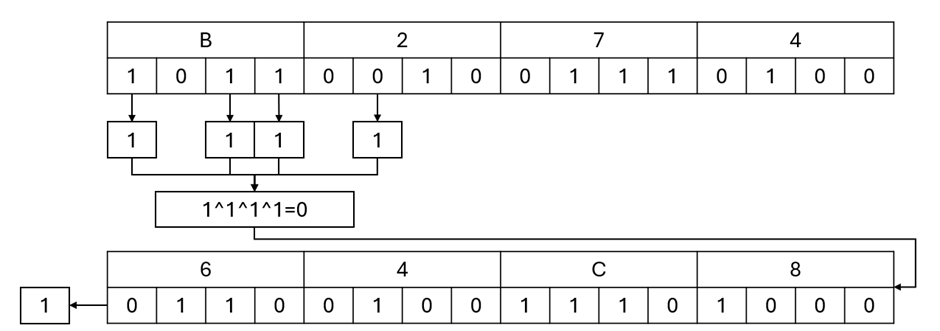

In this project, a 16-bit LFSR with feedback taps at position 16, 14, 13 and 11 are used, giving the polynomial representation as P(x)=x^16+x^14+x^13+x^11+1. This gives 65535 possible values before repeating. This is sufficient as the randomness is not dependent on the sequence alone. The sequence is then taken via Universal Asynchronous Receiver Transmitter (UART) to a connected computer. Python is used to receive and interpret the data.

**New Top Module**

In [ ]:
module top_module(
    input sysclk,
    input [1:0] btn,
    output pio37,
    output pio38,
    output pio39,
    output pio40,
    output pio41,
    output pio42,
    output pio43,
    output pio44,
    output pio45,
    output pio46,
    output pio47,
    output pio48,
    output [1:0] led,
    output adc_din,
    output adc_clk,
    output adc_csn,
    input  adc_dout,
    output uart_rxd_out
);

//==== RESET ====
wire rstn;
assign rstn = ~btn[1];

//==== CLOCKS ====
wire CLK500Hz, CLK1Hz, CLK_ADC, CLK_UART, CLK100Hz, CLK250Hz;

clock_div clk_div_u1(rstn, sysclk, CLK500Hz);
clock_div clk_div_u2(rstn, CLK500Hz, CLK1Hz);
clock_div clk_div_u3(rstn, sysclk, CLK_ADC);
clock_div clk_div_u4(rstn, sysclk, CLK_UART);
clock_div clk_div_u5(rstn, sysclk, CLK100Hz);
clock_div clk_div_u6(rstn, sysclk, CLK250Hz);

defparam clk_div_u1.FREQ_INPUT  = 12_000_000;
defparam clk_div_u1.FREQ_OUTPUT = 500;
defparam clk_div_u2.FREQ_INPUT  = 500;
defparam clk_div_u2.FREQ_OUTPUT = 1;
defparam clk_div_u3.FREQ_INPUT  = 12_000_000;
defparam clk_div_u3.FREQ_OUTPUT = 2_000_000;
defparam clk_div_u4.FREQ_INPUT  = 12_000_000;
defparam clk_div_u4.FREQ_OUTPUT = 9600;
defparam clk_div_u5.FREQ_INPUT  = 12_000_000;
defparam clk_div_u5.FREQ_OUTPUT = 100;
defparam clk_div_u6.FREQ_INPUT  = 12_000_000;
defparam clk_div_u6.FREQ_OUTPUT = 200;

//==== DISPLAY ====
reg [15:0] Segment_data;
drv_segment segment_u0(
    .rstn(rstn),
    .clk500hz(CLK500Hz),
    .bcd_num(Segment_data),
    .an({pio43, pio46, pio47, pio37}),
    .segment({pio40, pio38, pio45, pio42, pio41, pio39, pio48, pio44})
);

//==== ADC ====
localparam SINGLE_CHAN0 = 2'b10;

reg adc_ready;
wire adc_vaild;
wire [11:0] adc_data;

drv_mcp3202 drv_mcp3202_u0(
    .rstn(rstn),
    .clk(CLK_ADC),
    .ap_ready(adc_ready),
    .ap_vaild(adc_vaild),
    .mode(SINGLE_CHAN0),
    .data(adc_data),
    .port_din(adc_dout),
    .port_dout(adc_din),
    .port_clk(adc_clk),
    .port_cs(adc_csn)
);

//==== SIMPLE LFSR PRNG ====
reg [15:0] lfsr;

always @(posedge CLK250Hz or negedge rstn) begin
    if (!rstn) begin
        lfsr <= {adc_data, 4'b1010}; // use ADC + noise bits to seed
    end else begin
        // 16-bit maximal LFSR taps: 16,14,13,11
        lfsr <= {lfsr[14:0], lfsr[15] ^ lfsr[13] ^ lfsr[12] ^ lfsr[10]};
    end
end

assign led[0] = adc_vaild; // optional debug

//==== UPDATE DISPLAY ====
always @(posedge CLK250Hz or negedge rstn) begin
    if (!rstn)
        Segment_data <= 16'h0000;
    else
        Segment_data <= lfsr;
end

//==== UART ====
reg uart_ready;
wire uart_vaild;
reg [7:0] uart_data;
reg hl_sel;

drv_uart_tx drv_uart_u0(
    .clk(CLK_UART),
    .ap_rstn(rstn),
    .ap_ready(uart_ready),
    .ap_vaild(uart_vaild),
    .tx(uart_rxd_out),
    .pairty(1'b0),
    .data(uart_data)
);

always @(negedge rstn or posedge uart_vaild or negedge CLK500Hz) begin
    if (!rstn) begin
        uart_ready <= 1'b0;
        hl_sel <= 1'b0;
    end else begin
        if (uart_vaild) begin
            uart_data <= (hl_sel) ? Segment_data[15:8] : Segment_data[7:0];
            uart_ready <= 1'b0;
        end else begin
            uart_ready <= 1'b1;
            hl_sel <= ~hl_sel;
        end
    end
end

endmodule

#Testing Distribution

To test for randomness, the CMOD A7 will output a 16-bit value every 250Hz in 8-bit chunks through UART to a computer. The computer will run a python code to collect the data sent for 5 minutes and plot a histogram as shown below.

In [ ]:
import serial
import time
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

# ---- Serial Configuration ----
PORT = 'COM9'  # Change to your serial port
BAUDRATE = 9600

# ---- Open Serial Port ----
ser = serial.Serial(
    port=PORT,
    baudrate=BAUDRATE,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_ODD,
    stopbits=serial.STOPBITS_ONE,
    timeout=1
)

# ---- Data Collection ----
timeset = 30
print(f"Collecting serial data for {timeset/60} min...")
data = []
start_time = time.time()

while time.time() - start_time < timeset:
    if ser.in_waiting >= 2:
        raw_bytes = ser.read(2)
        if len(raw_bytes) == 2:
            high_byte = raw_bytes[0]
            low_byte = raw_bytes[1]
            value = (high_byte << 8) | low_byte
            data.append(value)

ser.close()
# Convert to numpy array
data = np.array(data).reshape(-1, 1)
data = np.array(data).flatten()  # Flatten if reshaped earlier
window_size = 50

# ---- Apply Central Limit Theorem (Rolling Average of Uniform Data) ----
window_size = 50  # Try 50–100; higher values = smoother/closer to Gaussian
rolling_avg = np.convolve(data, np.ones(window_size)/window_size, mode='valid')
transformed_data = rolling_avg  # Use this for analysis

# ---- Histogram with Normal Curve Overlay ----
plt.figure(figsize=(10, 6))
sns.histplot(data, bins=100, kde=True, stat="density", color="skyblue", label="Data")

# Fit a normal distribution and overlay
mu, std = np.mean(data), np.std(data)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', label='Normal Distribution Fit')
plt.title("Histogram with Normal Distribution Fit")
plt.xlabel("16-bit Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# ---- Q-Q Plot ----
plt.figure(figsize=(6, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.grid(True)
plt.show()

# ---- Histogram ----
plt.figure(figsize=(10, 6))
sns.histplot(transformed_data, bins=100, kde=True, stat="density", color="skyblue", label="CLT Smoothed Data")

mu, std = np.mean(transformed_data), np.std(transformed_data)
x = np.linspace(mu - 4*std, mu + 4*std, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', label='Gaussian Fit')
plt.title("Histogram of CLT-Transformed Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# ---- Q-Q Plot ----
plt.figure(figsize=(6, 6))
stats.probplot(transformed_data, dist="norm", plot=plt)
plt.title("Q-Q Plot (CLT Transformed)")
plt.grid(True)
plt.show()

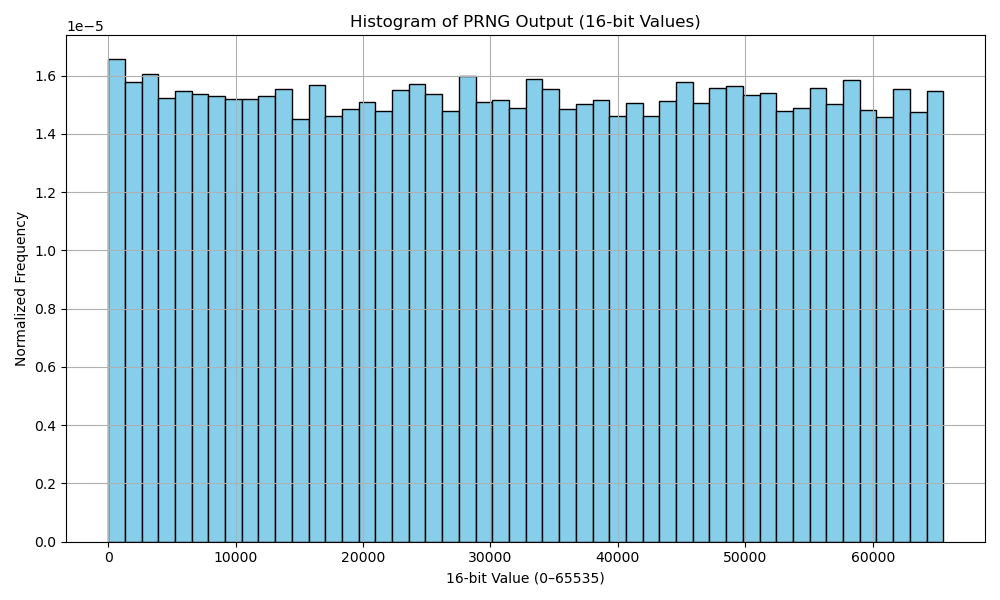

The histogram shows a uniform distribution of values which is ideal for our game, since the objective is to not have a bias towards 1 block over another.

To reshape the uniform distribution to approximate gaussian distribution, using Central Limit Theorem (CLT). Central limit theorem states that the distribution of a normalised version of the sample mean converge to a normal distribution. To do this, it creates a rolling average by calculating the average of 50 values in the sequence. The transformed data is shown in the plot below.

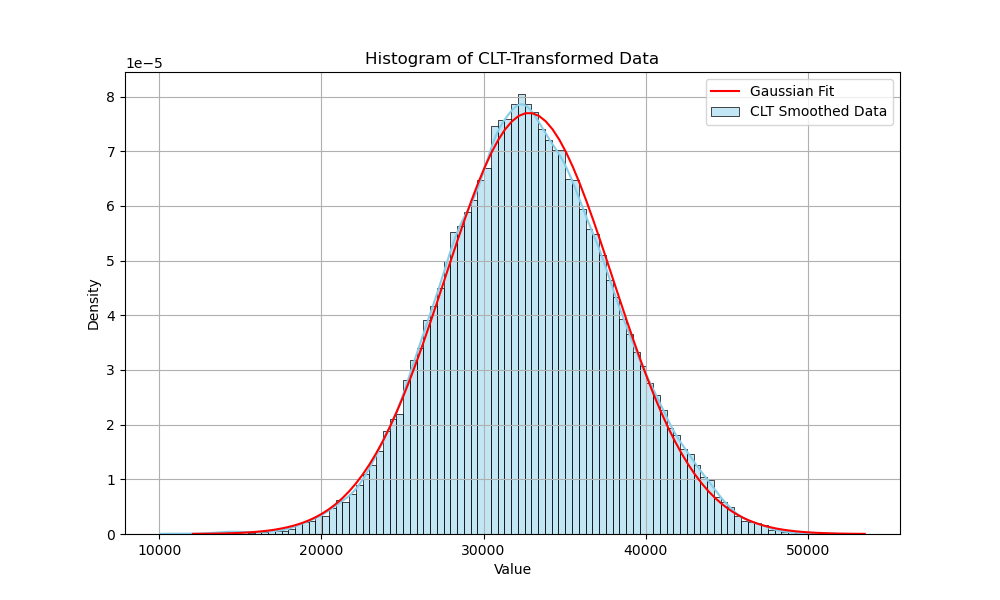

The Q-Q plot shows how close the data matches normal distribution

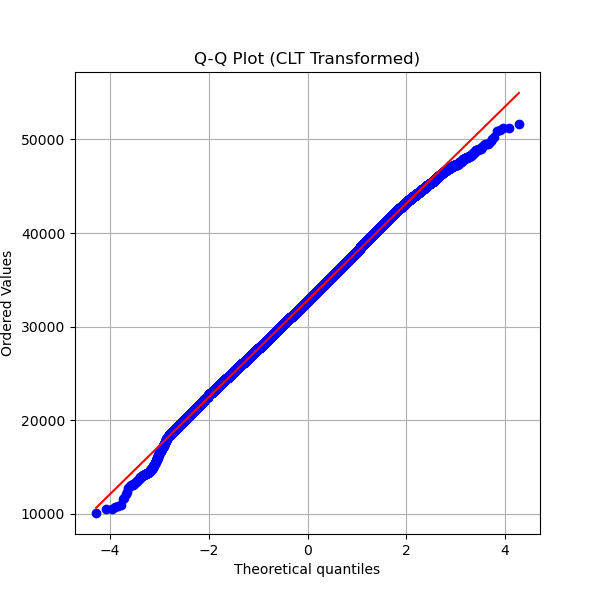

##Game code

In [ ]:
import pygame
import sys
import serial
import threading
import random

# === UART SETUP ===
ser = serial.Serial('COM12', 9600, timeout=1)
BLOCKS = ['I', 'O', 'T', 'S', 'Z', 'J', 'L']
current_block = 'I'

def uart_listener():
    global current_block
    buffer = ""
    while True:
        try:
            char = ser.read().decode('utf-8', errors='ignore')
            if char.upper() in "0123456789ABCDEF":
                buffer += char.upper()
                if len(buffer) == 4:
                    value = int(buffer, 16)
                    current_block = BLOCKS[value % 7]
                    buffer = ""
            elif char not in ['\n', '\r', '']:
                buffer = ""
        except:
            pass

# Start UART listener in a thread
threading.Thread(target=uart_listener, daemon=True).start()

# === TETRIS GAME SETUP ===
pygame.init()
WIDTH, HEIGHT = 300, 600
CELL_SIZE = 30
COLUMNS, ROWS = WIDTH // CELL_SIZE, HEIGHT // CELL_SIZE
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("FPGA Tetris")
clock = pygame.time.Clock()

# Colors
BLACK = (0, 0, 0)
GRAY = (50, 50, 50)
WHITE = (255, 255, 255)
COLORS = {
    'I': (0, 255, 255), 'O': (255, 255, 0), 'T': (128, 0, 128),
    'S': (0, 255, 0), 'Z': (255, 0, 0), 'J': (0, 0, 255), 'L': (255, 165, 0)
}

# Block shapes
SHAPES = {
    'I': [[1, 1, 1, 1]],
    'O': [[1, 1], [1, 1]],
    'T': [[0, 1, 0], [1, 1, 1]],
    'S': [[0, 1, 1], [1, 1, 0]],
    'Z': [[1, 1, 0], [0, 1, 1]],
    'J': [[1, 0, 0], [1, 1, 1]],
    'L': [[0, 0, 1], [1, 1, 1]]
}

# Game grid
grid = [[None for _ in range(COLUMNS)] for _ in range(ROWS)]
score = 0
lives = 3
font = pygame.font.SysFont("consolas", 20)

class Block:
    def __init__(self, shape):
        self.shape = SHAPES[shape]
        self.color = COLORS[shape]
        self.x = COLUMNS // 2 - len(self.shape[0]) // 2
        self.y = 0

    def draw(self):
        for dy, row in enumerate(self.shape):
            for dx, val in enumerate(row):
                if val:
                    pygame.draw.rect(screen, self.color,
                        pygame.Rect((self.x + dx) * CELL_SIZE, (self.y + dy) * CELL_SIZE, CELL_SIZE, CELL_SIZE))

    def can_move(self, dx, dy):
        for y, row in enumerate(self.shape):
            for x, val in enumerate(row):
                if val:
                    nx, ny = self.x + x + dx, self.y + y + dy
                    if nx < 0 or nx >= COLUMNS or ny >= ROWS or (ny >= 0 and grid[ny][nx]):
                        return False
        return True

    def lock(self):
        for y, row in enumerate(self.shape):
            for x, val in enumerate(row):
                if val:
                    grid[self.y + y][self.x + x] = self.color

    def rotate(self):
        rotated = list(zip(*self.shape[::-1]))
        old_shape = self.shape
        self.shape = [list(row) for row in rotated]
        if not self.can_move(0, 0):
            self.shape = old_shape

# Spawn first block
block = Block(current_block)
fall_time = 0
FALL_SPEED = 500

def clear_lines():
    global grid, score
    new_grid = [row for row in grid if any(cell is None for cell in row)]
    cleared = ROWS - len(new_grid)
    score += cleared * 100
    for _ in range(cleared):
        new_grid.insert(0, [None] * COLUMNS)
    grid = new_grid

def is_game_over():
    return any(grid[0][x] is not None for x in range(COLUMNS))

def draw_ui():
    score_text = font.render(f"Score: {score}", True, WHITE)
    lives_text = font.render(f"Lives: {lives}", True, WHITE)
    screen.blit(score_text, (10, 5))
    screen.blit(lives_text, (WIDTH - 100, 5))

# === GAME LOOP ===
running = True
while running:
    screen.fill(BLACK)
    dt = clock.tick(30)
    fall_time += dt

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT and block.can_move(-1, 0):
                block.x -= 1
            elif event.key == pygame.K_RIGHT and block.can_move(1, 0):
                block.x += 1
            elif event.key == pygame.K_DOWN and block.can_move(0, 1):
                block.y += 1
            elif event.key == pygame.K_UP:
                block.rotate()

    if fall_time > FALL_SPEED:
        if block.can_move(0, 1):
            block.y += 1
        else:
            if block.y <= 0:
                lives -= 1
                if lives <= 0:
                    print("Game Over! Final Score:", score)
                    running = False
            else:
                block.lock()
                clear_lines()
            block = Block(current_block)
        fall_time = 0

    block.draw()

    for y in range(ROWS):
        for x in range(COLUMNS):
            if grid[y][x]:
                pygame.draw.rect(screen, grid[y][x], pygame.Rect(x * CELL_SIZE, y * CELL_SIZE, CELL_SIZE, CELL_SIZE))

    draw_ui()
    pygame.display.flip()

pygame.quit()
sys.exit()


Let's break down each section of the game code

###Random block generator code

This section of the code listens for and collects valid 4-character hexadecimal inputs, converts each input into an integer, and maps that number to one of 7 Tetris block shapes (I, O, T, S, Z, J, L) using modulo 7. Once that is done, it prints the result and starts over. This code block has been reworked to fit into the rest of the game by starting the module in a background thread so that it doesn't block the main game.



In [ ]:
import serial

ser = serial.Serial('COM12', 9600, timeout=1)
BLOCKS = ['I', 'O', 'T', 'S', 'Z', 'J', 'L']

def get_next_block():
    buffer = ""
    while True:
        try:
            char = ser.read().decode('utf-8', errors='ignore')
            if char.upper() in "0123456789ABCDEF":
                buffer += char.upper()
                if len(buffer) == 4:
                    value = int(buffer, 16)
                    block = BLOCKS[value % 7]
                    print(f"Received: {buffer} → {value} → Block: {block}")
                    buffer = ""  # reset for next block
                    return block
            elif char not in ['\n', '\r', '']:
                print(f"⚠ Skipped invalid char: '{char}'")
        except Exception as e:
            print("UART Error:", e)

# Test loop
if __name__ == "__main__":
    print("🎮 Listening for 4-character hex blocks...")
    while True:
        block = get_next_block()


The game is initialised, blocks are mapped to a colour and shape, and a 2D grid is initialised to represent the game board.

In [ ]:
# === TETRIS GAME SETUP ===
pygame.init()
WIDTH, HEIGHT = 300, 600
CELL_SIZE = 30
COLUMNS, ROWS = WIDTH // CELL_SIZE, HEIGHT // CELL_SIZE
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("FPGA Tetris")
clock = pygame.time.Clock()

# Colors
BLACK = (0, 0, 0)
GRAY = (50, 50, 50)
WHITE = (255, 255, 255)
COLORS = {
    'I': (0, 255, 255), 'O': (255, 255, 0), 'T': (128, 0, 128),
    'S': (0, 255, 0), 'Z': (255, 0, 0), 'J': (0, 0, 255), 'L': (255, 165, 0)
}

# Block shapes
SHAPES = {
    'I': [[1, 1, 1, 1]],
    'O': [[1, 1], [1, 1]],
    'T': [[0, 1, 0], [1, 1, 1]],
    'S': [[0, 1, 1], [1, 1, 0]],
    'Z': [[1, 1, 0], [0, 1, 1]],
    'J': [[1, 0, 0], [1, 1, 1]],
    'L': [[0, 0, 1], [1, 1, 1]]
}

# Game grid
grid = [[None for _ in range(COLUMNS)] for _ in range(ROWS)]
score = 0
lives = 3
font = pygame.font.SysFont("consolas", 20)

###Block Class and Behaviours

Represents a falling Tetris block. Contains methods:

*    draw(): Draws the block.
*    can_move(dx, dy): Checks if the block can move in a direction.
*    lock(): Locks the block into the grid when it can’t fall anymore.
*    rotate(): Rotates the block (with a collision check).

In [ ]:
class Block:
    def __init__(self, shape):
        self.shape = SHAPES[shape]
        self.color = COLORS[shape]
        self.x = COLUMNS // 2 - len(self.shape[0]) // 2
        self.y = 0

    def draw(self):
        for dy, row in enumerate(self.shape):
            for dx, val in enumerate(row):
                if val:
                    pygame.draw.rect(screen, self.color,
                        pygame.Rect((self.x + dx) * CELL_SIZE, (self.y + dy) * CELL_SIZE, CELL_SIZE, CELL_SIZE))

    def can_move(self, dx, dy):
        for y, row in enumerate(self.shape):
            for x, val in enumerate(row):
                if val:
                    nx, ny = self.x + x + dx, self.y + y + dy
                    if nx < 0 or nx >= COLUMNS or ny >= ROWS or (ny >= 0 and grid[ny][nx]):
                        return False
        return True

    def lock(self):
        for y, row in enumerate(self.shape):
            for x, val in enumerate(row):
                if val:
                    grid[self.y + y][self.x + x] = self.color

    def rotate(self):
        rotated = list(zip(*self.shape[::-1]))
        old_shape = self.shape
        self.shape = [list(row) for row in rotated]
        if not self.can_move(0, 0):
            self.shape = old_shape

### Working of Main Game

The first block is spawned using the latest `current_block` from UART, and every 500ms, it falls by one cell. If it can't move down, it is locked into the grid, full lines are cleared, and a new block is spawned, starting the process all over again. If the block locks at the top, you lose a life. After losing 3 lives, the game ends.

Updating the score is done by adding 100 points per cleared line. `draw_ui()` shows the current score and remaining lives.





In [ ]:
# Spawn first block
block = Block(current_block)
fall_time = 0
FALL_SPEED = 500

def clear_lines():
    global grid, score
    new_grid = [row for row in grid if any(cell is None for cell in row)]
    cleared = ROWS - len(new_grid)
    score += cleared * 100
    for _ in range(cleared):
        new_grid.insert(0, [None] * COLUMNS)
    grid = new_grid

def is_game_over():
    return any(grid[0][x] is not None for x in range(COLUMNS))

def draw_ui():
    score_text = font.render(f"Score: {score}", True, WHITE)
    lives_text = font.render(f"Lives: {lives}", True, WHITE)
    screen.blit(score_text, (10, 5))
    screen.blit(lives_text, (WIDTH - 100, 5))

# === GAME LOOP ===
running = True
while running:
    screen.fill(BLACK)
    dt = clock.tick(30)
    fall_time += dt

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_LEFT and block.can_move(-1, 0):
                block.x -= 1
            elif event.key == pygame.K_RIGHT and block.can_move(1, 0):
                block.x += 1
            elif event.key == pygame.K_DOWN and block.can_move(0, 1):
                block.y += 1
            elif event.key == pygame.K_UP:
                block.rotate()

    if fall_time > FALL_SPEED:
        if block.can_move(0, 1):
            block.y += 1
        else:
            if block.y <= 0:
                lives -= 1
                if lives <= 0:
                    print("Game Over! Final Score:", score)
                    running = False
            else:
                block.lock()
                clear_lines()
            block = Block(current_block)
        fall_time = 0

    block.draw()

    for y in range(ROWS):
        for x in range(COLUMNS):
            if grid[y][x]:
                pygame.draw.rect(screen, grid[y][x], pygame.Rect(x * CELL_SIZE, y * CELL_SIZE, CELL_SIZE, CELL_SIZE))

    draw_ui()
    pygame.display.flip()

pygame.quit()
sys.exit()


# Video

Demo video: https://drive.google.com/file/d/1Pn_gL52kKr59tQnM5l5TNy3PVztUYKQB/view?usp=sharing

#Challenges

1.  The python script initially received the data as single characters without interpreting it as hexadecimal values, resulting in the blocks not being generated correctly. Thus, we implemented a buffer that allows the python code to read the data in 4-character sequences as proper hexadecimal values.


2. Synchronization was required as the 7-segment display and UART used different time domains. Separate clock dividers were used to display refreshing (500 Hz) and UART transmission (9600 baud) to ensure consistency.


3. To prevent the Tetris game from freezing while waiting for UART input, the UART reader was placed in a separate thread to handle serial communication independently in the background while the main game code continues running simultaneously without interruption.


4. Early implementations of the PRNG used shorter LFSRs, which led to visibly repetitive patterns. Hence, the LFSR was extended to 16 bits and environmental noise was incorporated to enhanced the randomness of the system.


# Lessons Learned

1. FPGA to PC communication requires framing discipline — without proper formatting (e.g., newline-terminated or fixed-width data), even small timing mismatches can lead to misinterpretation on the receiver end.

2. Threading is essential when merging asynchronous data streams (like UART) into real-time software systems such as games.

3. Hardware and software co-design is iterative as small changes in either domain often require adjustments on the other side, especially when working with communication protocols or real-time systems.

##References

[1]	AMD. (n.d.). XAPP052: HDL Coding Techniques. Retrieved, from https://docs.amd.com/v/u/en-US/xapp052

[2]	Shedden, K. (n.d.). Central Limit Theorem and Gaussianity. University of Michigan. Retrieved from https://dept.stat.lsa.umich.edu/~kshedden/introds/topics/clt_gaussianity/

[3]	Teo, T. H., & et al. (2024). Hardware implementation of multi-LFSR pseudo-random number generator. TENCON 2024 - 2024 IEEE Region 10 Conference (TENCON), Singapore, Singapore, 382-385. https://doi.org/10.1109/TENCON61640.2024.10902949



#AI Usage

ChatGPT was used to aid us in the creation of the code for the Tetris game and breaking it down in detail to explain how it works, as well as how the priniciples of psuedo randomness is applied to the project.

Additional

Random Colour Test

In [ ]:
import serial
import time
import matplotlib.pyplot as plt

# ---- Serial Config ----
PORT = 'COM9'  # Change to your port
BAUDRATE = 9600

ser = serial.Serial(
    port=PORT,
    baudrate=BAUDRATE,
    bytesize=serial.EIGHTBITS,
    parity=serial.PARITY_ODD,
    stopbits=serial.STOPBITS_ONE,
    timeout=1
)

# ---- Data Collection ----
hex_values = []
start_time = time.time()

print("Collecting data for 60 seconds...")
while time.time() - start_time < 60:
    if ser.in_waiting:
        byte = ser.read()
        hex_values.append(int.from_bytes(byte, byteorder='big'))

ser.close()
print(f"Collected {len(hex_values)} bytes.")

# ---- Plotting ----
plt.figure(figsize=(10, 5))
plt.scatter(range(len(hex_values)), hex_values, s=10, c='blue', alpha=0.6)
plt.title("Serial Hex Values Collect Over 60 Seconds")
plt.xlabel("Count")
plt.ylabel("Hex Value (Decimal)")
plt.grid(True)
plt.show()

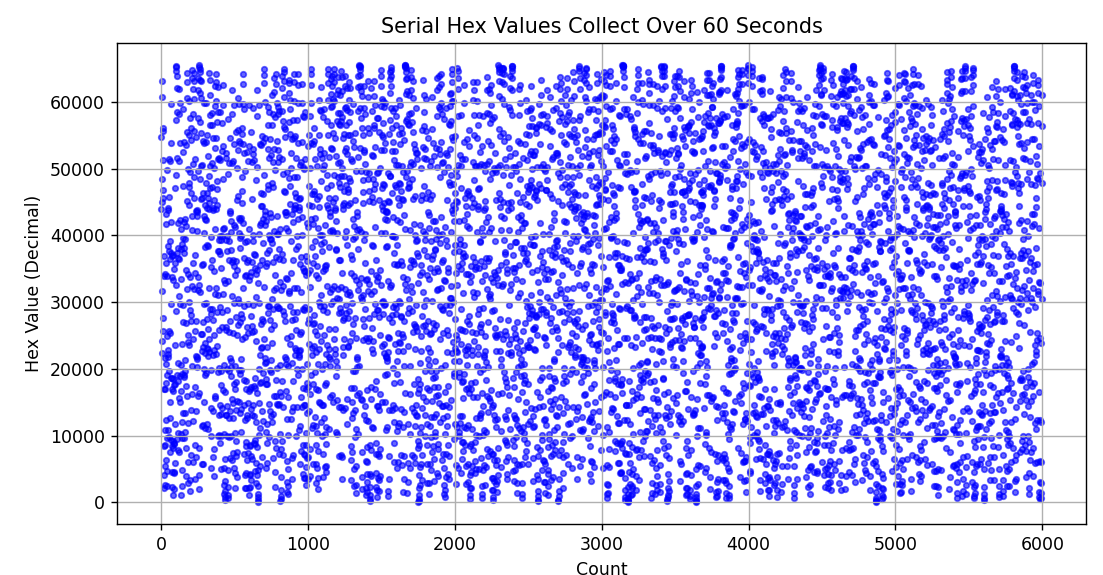